In [1]:
# Data packages
import numpy as np
import pandas as pd

# Sci-kit learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline


# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

1.) (ISLP: Chapter 6, Question 9) In this exercise, we will predict the number of applications
received using the other variables in the College data set.


(a) Split the data set into a training set and a test set. Please use a 50/50 training/test split.
To avoid confusion among partners and facilitate grading, set random_state=37 when
you split the data. Be sure to standardize the data (for models that require it) using the
StandardScaler function. You should scale after splitting your data.

(b) Fit a linear model using least squares on the training set, and report the test error ob-
tained.

(c) Fit a principal components regression (PCR) model on the training set, with M chosen
by cross-validation. 2 Use 10-fold cross-validation (10FCV) on the training set, shuffle
the data randomly for splitting, and set random_state=1. Report the test error ob-
tained, along with the value of M selected by cross-validation, both by minimizing the
appropriate cross-validated error and using the “elbow method.”

(d) Fit a partial least squares (PLS) model on the training set, with M chosen by cross-
validation, using the same cross-validation settings as given in the previous ques-
tion. Report the test error obtained, along with the value of M selected by cross-
validation, both by minimizing the appropriate cross-validated error and using the “el-
bow method.”

(e) Comment on the results obtained. How accurately can we predict the number of college
applications received? Is there much difference among the test errors resulting from
these approaches?

In [2]:
college = pd.read_csv('Data-College.csv')
college['Private'] = college['Private'].replace({'Yes': 1, 'No': 0})

def ols_nator(df):
#a
    X = df.drop(['Apps', 'Unnamed: 0'], axis = 1)
    y = df['Apps']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 37)
#b
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

ols_nator(college)

1222954.038253478

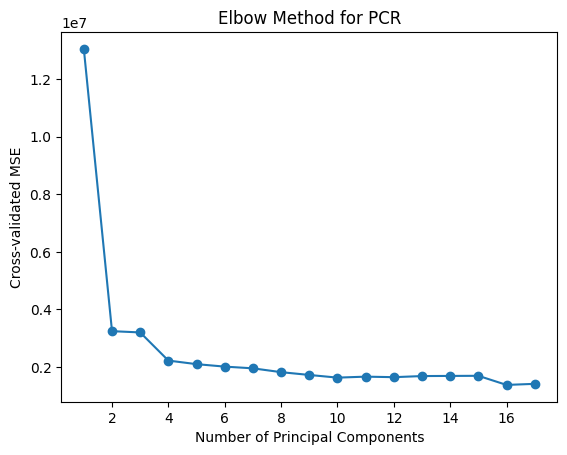

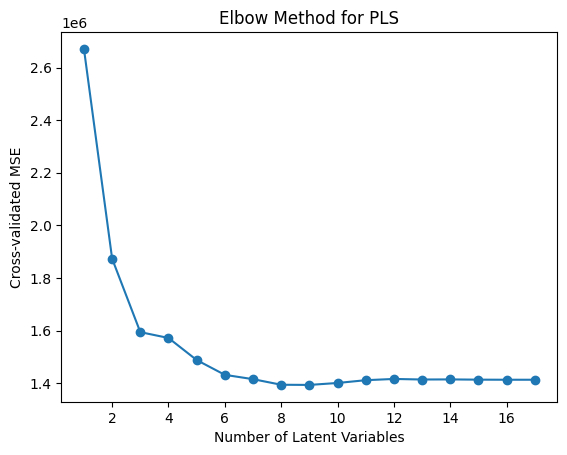

In [3]:
#c
def pcr_nator(df):
    X = df.drop(['Apps', 'Unnamed: 0'], axis=1)
    y = df['Apps']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=37)

    # Perform 10-fold cross-validation for PCR
    cv_errors = []
    pca = PCA()
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for m in range(1, X_train.shape[1] + 1):
        model_pcr = Pipeline([
            ('scale', StandardScaler()),
            ('pca', pca),
            ('regressor', LinearRegression())
        ])
        pca.n_components = m
        scores = cross_val_score(model_pcr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        cv_errors.append(-scores.mean())

    #elbow method
    plt.plot(range(1, X_train.shape[1] + 1), cv_errors, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cross-validated MSE')
    plt.title('Elbow Method for PCR')
    plt.show()

    optimal_m = np.argmin(cv_errors) + 1

    # Fit PCR model with optimal M
    model_pcr_optimal = Pipeline([
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=optimal_m)),
        ('regressor', LinearRegression())
    ])
    model_pcr_optimal.fit(X_train, y_train)

    # Calculate test error
    y_pred_pcr = model_pcr_optimal.predict(X_test)
    test_error_pcr = mean_squared_error(y_test, y_pred_pcr)

    return test_error_pcr, optimal_m

#d
def pls_nator(df):
    X = df.drop(['Apps', 'Unnamed: 0'], axis=1)
    y = df['Apps']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=37)

    # Perform 10-fold cross-validation for PLS
    cv_errors = []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for m in range(1, X_train.shape[1] + 1):
        model_pls = PLSRegression(n_components=m)
        scores = cross_val_score(model_pls, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        cv_errors.append(-scores.mean())

    # Find M using elbow method
    plt.plot(range(1, X_train.shape[1] + 1), cv_errors, marker='o')
    plt.xlabel('Number of Latent Variables')
    plt.ylabel('Cross-validated MSE')
    plt.title('Elbow Method for PLS')
    plt.show()

    optimal_m = np.argmin(cv_errors) + 1

    # Fit PLS model with optimal M
    model_pls_optimal = PLSRegression(n_components=optimal_m)


pcr_nator(college)
pls_nator(college)

(a) Sketch the tree corresponding to the partition of the predictor space illustrated in the
left-hand panel of the figure. The numbers inside the boxes indicate the mean of Y
within each region.

- see attached PDF

(b) Create a diagram similar to the left-hand panel of the figure, using the tree illustrated in
the right-hand panel of the same figure. You should divide up the predictor space into
the correct regions, and indicate the mean for each region.

- See attached PDF

3.) (ISLP: Chapter 8, Question 9) This question involves the OJ data set which is available on
Canvas

(a) Create a training set and a test set. Please use a 70/30 training/test split and set
random_state=3 when you split the data.

(b) Fit a full, unpruned tree to the training data, with Purchase as the response and the
other variables as predictors. When calling the DecisionTreeClassifier() function, please set random_state=2 . What is the training error rate?

(c) Create a plot of the full, unpruned tree from the previous question. 5 The plot is a
mess, isn’t it? For the purposes of this question, fit another tree with the max_depth
parameter set to 3 in order to get an interpretable plot. How many terminal nodes does
the tree have? Interpret the information displayed in the first (when reading from left
to right) of the terminal nodes on your plot.

(d) Use your fit of the full, unpruned tree to predict the response on the test data, and
produce a confusion matrix comparing the test labels to the predicted test labels. What
is the test error rate?



Training Accuracy: 0.9933244325767691
Test Accuracy: 0.7538940809968847


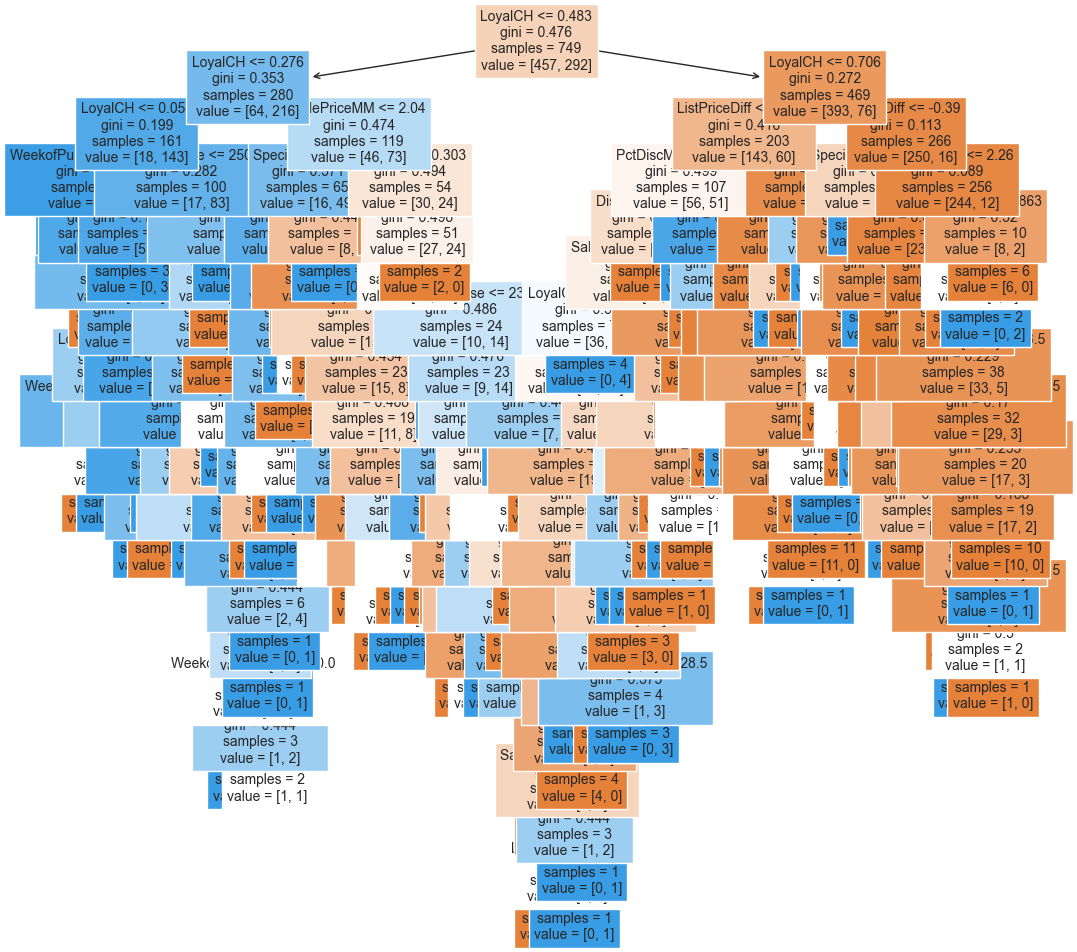

Test Error Rate: 0.2461059190031153
Confusion Matrix:
Test Accuracy: 0.7538940809968847
Test Error Rate: 0.2461059190031153


DecisionTreeClassifier(random_state=12)

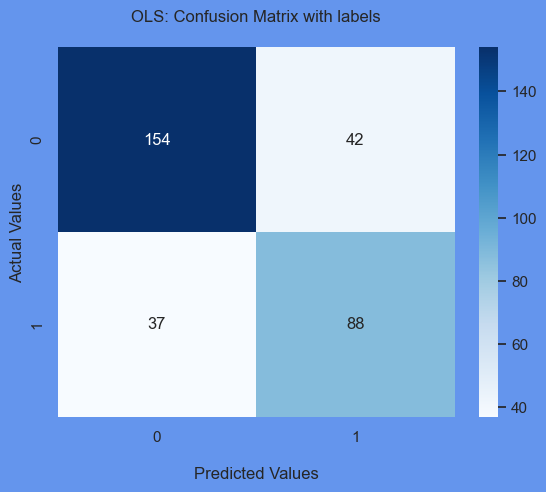

In [18]:
oj = pd.read_csv('Data-OJ.csv')
oj['Store7'] = oj['Store7'].replace({'Yes': 1, 'No': 0})

def unpruned_nator(df):
    X = df.drop(['Purchase'], axis=1)
    y = df['Purchase']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    
    # No stopping criterion
    full_model = DecisionTreeClassifier(
        random_state=12,
        criterion='gini')
    full_model.fit(X_train, y_train)

    print(f'Training Accuracy: {full_model.score(X_train, y_train)}')
    print(f'Test Accuracy: {full_model.score(X_test, y_test)}')

    # Plot the decision tree
    plt.figure(figsize=(12,12), facecolor='white')
    tree.plot_tree(full_model, fontsize=10, feature_names=X_train.columns.tolist(), filled=True)
    plt.show()

    # Predict on the test data
    y_hat_test = full_model.predict(X_test)

    # Calculate confusion matrix
    y_hat_test = full_model.predict(X_test)
    cm = confusion_matrix(y_test, y_hat_test)

    sns.set(rc={'figure.facecolor': 'cornflowerblue'})
    ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
    ax.set_title('OLS: Confusion Matrix with labels\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    print("Test Error Rate:", 1-accuracy_score(y_test, y_hat_test))

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_hat_test)

    print("Confusion Matrix:")
    print("Test Accuracy:", accuracy)
    print("Test Error Rate:", 1 - accuracy)

    return full_model

unpruned_nator(oj)


e) Use cost complexity pruning to determine the optimal subtree for prediction by tuning
the the α hyperparameter.6 Use 5-fold cross-validation (5FCV) to choose the optimal value of the hyperparameter.7 Produce a plot with the values of α (ccp_alpha) on the x-axis and the cross-validated classification error rate on the y-axis. Which α
corresponds to the lowest cross-validated classification error rate?

(f) Now produce a second plot showing the tree size on the x-axis and the cross-validated
classification error rate (that you calculated in the method in the previous question) on
the y-axis.8 Which tree size corresponds to the lowest cross-validated classification
error rate? Briefly explain why the value of α affects the tree size and the classification
error rate.

- The lowest classification error rate is 0.19222371364653257.
- The alpha that corresponds to this value is 0.01379269302194669
- The tree size that corresponds to this value is 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


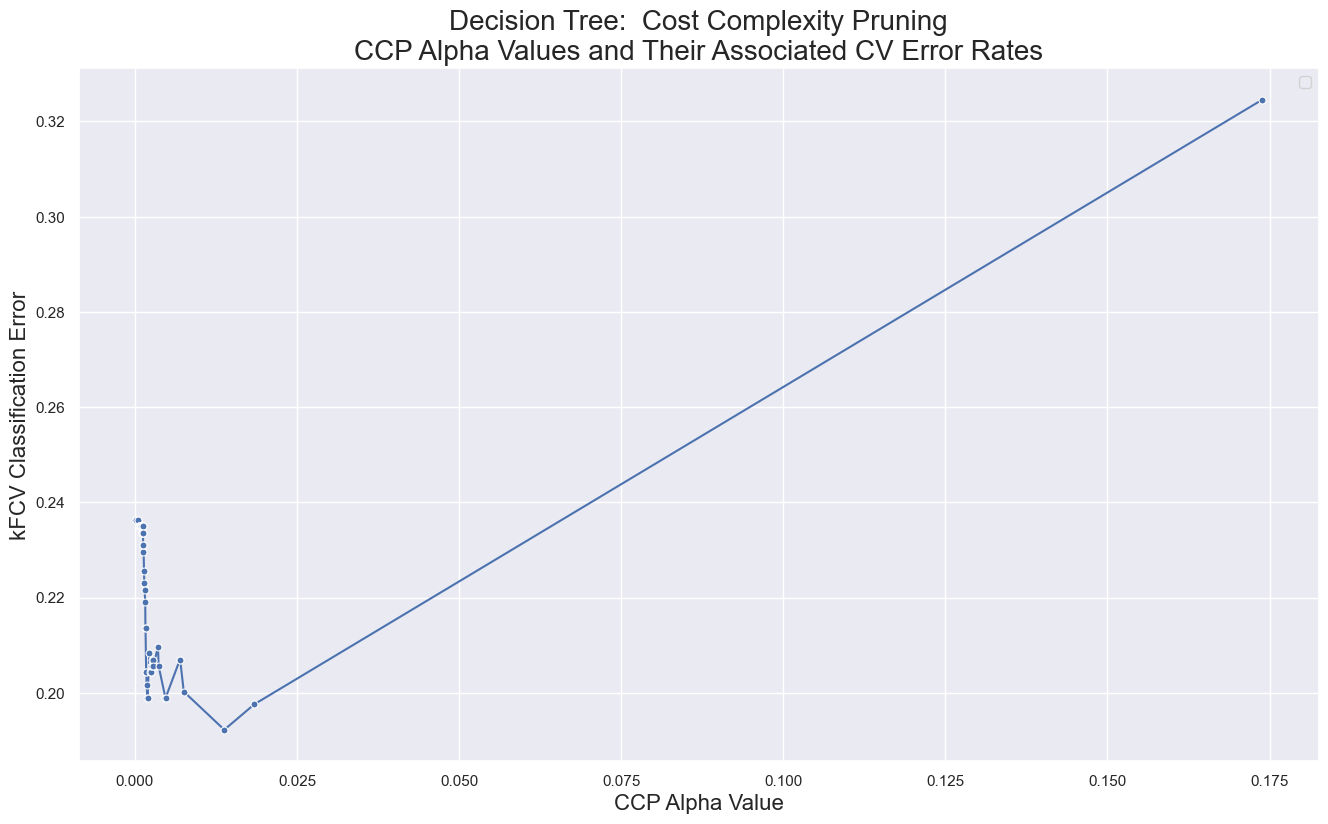

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


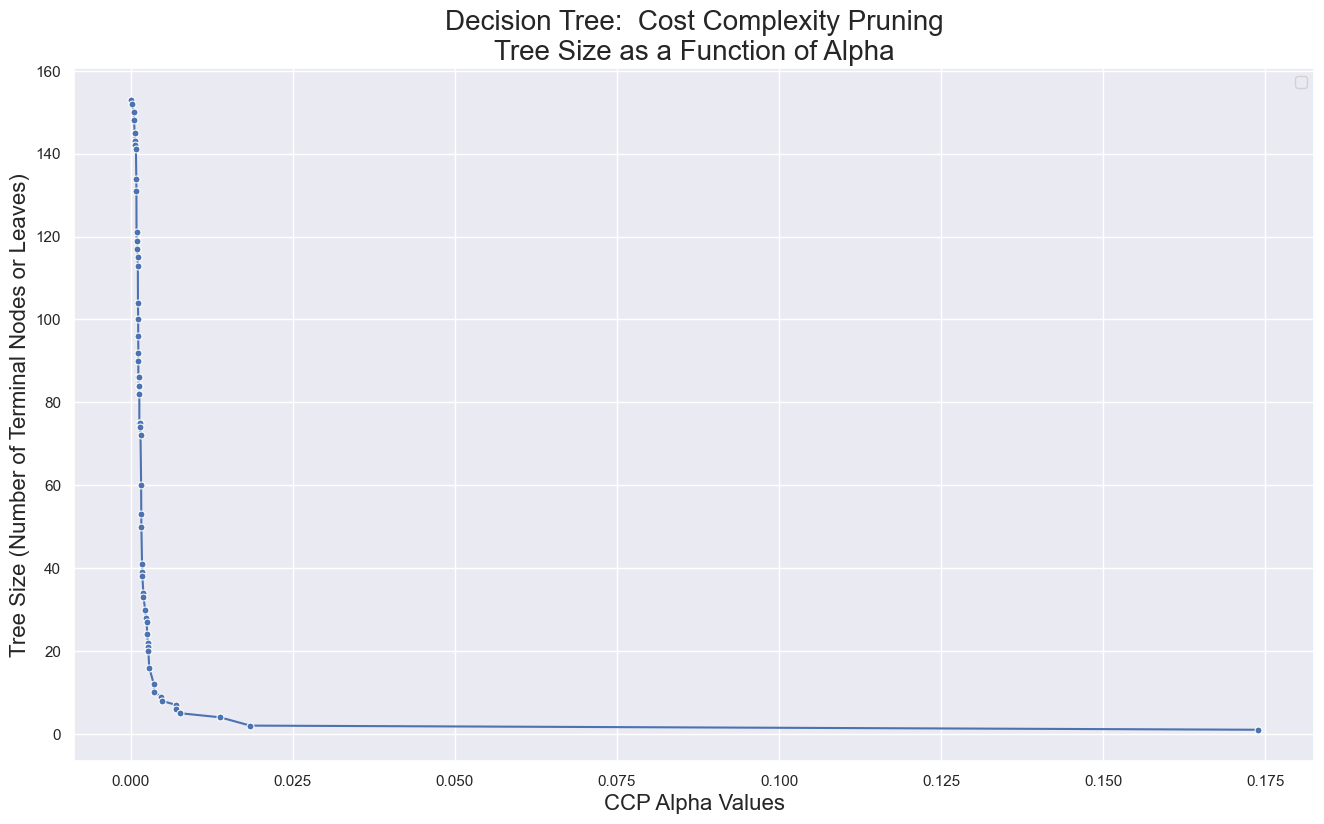

The lowest classification error rate is 0.19222371364653257.
The alpha that corresponds to this value is 0.01379269302194669
The tree size that corresponds to this value is 4


[0.23630425055928406,
 0.23630425055928406,
 0.23630425055928406,
 0.23630425055928406,
 0.23630425055928406,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595065,
 0.23497091722595076,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23363758389261746,
 0.23497091722595076,
 0.23497091722595076,
 0.23363758389261746,
 0.22962863534675615,
 0.23096196868008945,
 0.23096196868008945,
 0.22562863534675626,
 0.22296196868008944,
 0.22162863534675614,
 0.21897091722595075,
 0.21362863534675613,
 0.21362863534675613,
 0.2042774049217002,
 0.20429530201342272,
 0.20429530201342272,
 0.20162863534675624,
 0.19896196868008942,
 0.19896196868008942,
 0.20829530201342283,
 0.20428635

In [22]:
#e
def ccp_nator(df):
    X = df.drop(['Purchase'], axis=1)
    y = df['Purchase']

        # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
        
        # No stopping criterion
    full_model = DecisionTreeClassifier(
            random_state=12,
            criterion='gini')
    full_model.fit(X_train, y_train)

    path = full_model.cost_complexity_pruning_path(X_train, y_train)
    # get list of ccp_alpha values created for experimentation
    ccp_alphas = path.ccp_alphas
    #  save these values in a dictionary
    parameters = {'ccp_alpha': ccp_alphas}

    # Use GridSearchCV to iterate over the CCP alphas... 
    kf = KFold(n_splits=5, random_state = 13, shuffle=True)
    cv_tree = GridSearchCV(full_model, parameters, cv = kf, scoring='accuracy')
    cv_tree.fit(X_train, y_train)
    # ... and save the corresponding CV error for each alpha level
    cv_scores = []
    for mean_score in cv_tree.cv_results_["mean_test_score"]:
        # create list of error rates produced by each corresponding ccp_alpha 
        # (errors are saved in the same order as their alpha values appear in the ccp_alpha list)
        cv_scores.append(1-mean_score)
    
    # Plot the error rate as a function of alpha
    fig, ax = plt.subplots(figsize=(16,9), facecolor='white')
    sns.lineplot(x=ccp_alphas, y=cv_scores, marker='o', markersize=5, ax=ax)
    ax.set_ylabel("kFCV Classification Error", fontsize=16)
    ax.set_xlabel("CCP Alpha Value", fontsize=16)
    ax.set_title('Decision Tree:  Cost Complexity Pruning'
                '\nCCP Alpha Values and Their Associated CV Error Rates',
                fontsize=20)
    plt.legend()
    plt.show()

    # Plot the tree size as a function of alpha
    tree_size = []
    for a in ccp_alphas:
        clf_a = DecisionTreeClassifier(ccp_alpha=a, random_state=2, criterion='gini')
        clf_a.fit(X_train, y_train)
        tree_size.append(clf_a.get_n_leaves())

    fig, ax = plt.subplots(figsize=(16,9), facecolor='white')
    sns.lineplot(x=ccp_alphas, y=tree_size, marker='o', markersize=5, ax=ax)
    ax.set_ylabel("Tree Size (Number of Terminal Nodes or Leaves)", fontsize=16)
    ax.set_xlabel("CCP Alpha Values", fontsize=16)
    ax.set_title('Decision Tree:  Cost Complexity Pruning'
                '\nTree Size as a Function of Alpha',
                fontsize=20)
    plt.legend()
    plt.show()

    # determine the alpha value where the minimum cv error occured
    min_error = min(cv_scores)
    idx = np.where(cv_scores == min_error)[0][0]
    alpha_at_min_error = ccp_alphas[idx]
    # and get the size of the tree at this alpha value
    size_at_min_error = tree_size[idx]

    print(f"The lowest classification error rate is {min_error}."
        f"\nThe alpha that corresponds to this value is {alpha_at_min_error}"
        f"\nThe tree size that corresponds to this value is {size_at_min_error}")

    return cv_scores

ccp_nator(oj)

(g) Produce a plot of the optimal pruned subtree obtained using cross-validation.


(h) Compare the training error rates between the pruned and unpruned trees. Which is
higher? Briefly explain.


(i) Compare the test error rates between the pruned and unpruned trees. Which is higher?
Briefly explain

- it went down significantly form .24 to .19

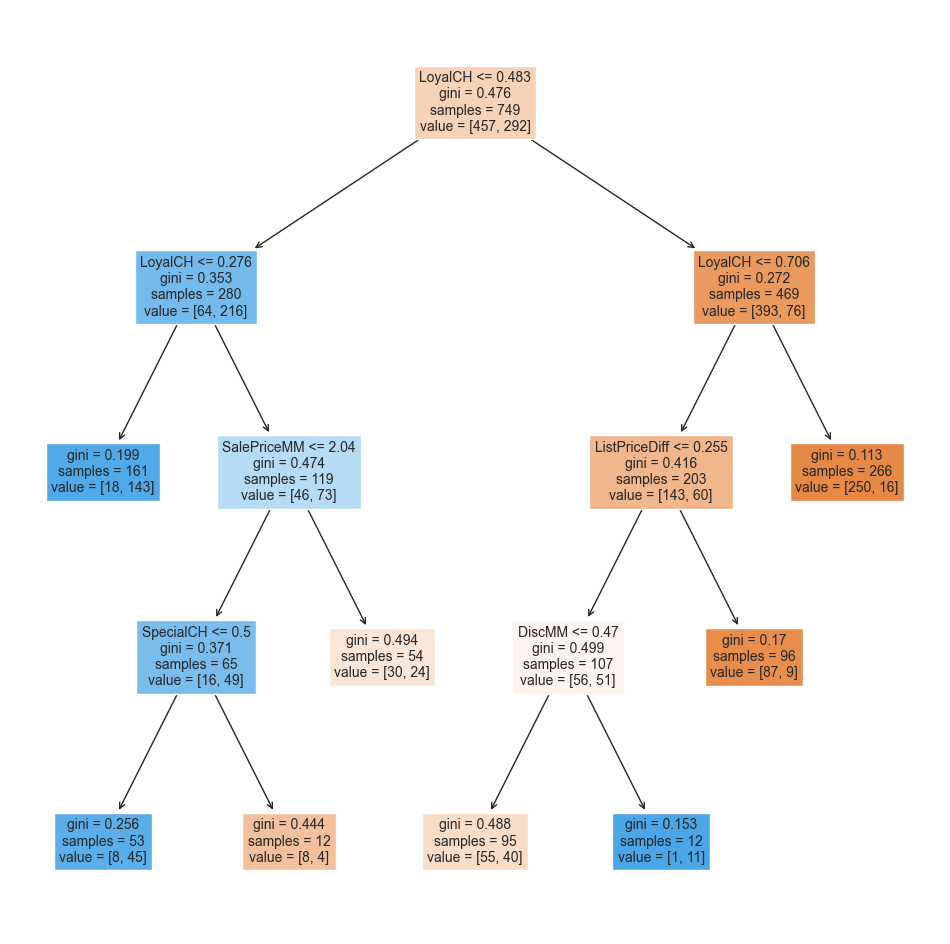

Test Error: 0.1931464174454829


DecisionTreeClassifier(ccp_alpha=0.005983721265819762, random_state=2)

In [23]:
def optimal_prune_nator(df):
    X = df.drop(['Purchase'], axis=1)
    y = df['Purchase']

            # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

    pruned_model = DecisionTreeClassifier(ccp_alpha=0.005983721265819762, random_state=2, 
                                        criterion='gini').fit(X_train, y_train)

    #show a visual display of the tree
    plt.figure(figsize=(12,12), facecolor='white')
    tree.plot_tree(pruned_model, fontsize=10, feature_names=X_train.columns.tolist(), filled=True)
    plt.show()

    # make predictions on the test set using the optimal, pruned tree model
    print(f'Test Error: {1 - pruned_model.score(X_test, y_test)}')

    return pruned_model

optimal_prune_nator(oj)

